In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sacc
import os

In [3]:
TXPipe_theory = sacc.Sacc.load_fits('/Users/chihwaychang/Downloads/twopoint_theory_real_with_cov.sacc')
TXPipe_data = sacc.Sacc.load_fits('/Users/chihwaychang/Downloads/summary_statistics_real.sacc')
Firecrown = sacc.Sacc.load_fits('/Users/chihwaychang/Downloads/twopoint_theory_real_with_cov_firecrown_theory.sacc')

W = "galaxy_density_xi"
GAMMA = "galaxy_shearDensity_xi_t"
GAMMAX = "galaxy_shearDensity_xi_x"
XIP = "galaxy_shear_xi_plus"
XIM = "galaxy_shear_xi_minus"
EE = "galaxy_shear_cl_ee"
DD = "galaxy_density_cl"
ED = "galaxy_shearDensity_cl_e"

In [4]:
dir(TXPipe_theory)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_2pt',
 '_get_2pt',
 '_get_tags_by_index',
 '_indices_to_bool',
 '_make_window_tables',
 'add_covariance',
 'add_data_point',
 'add_ell_cl',
 'add_theta_xi',
 'add_tracer',
 'add_tracer_object',
 'copy',
 'covariance',
 'data',
 'get_bandpower_windows',
 'get_data_points',
 'get_data_types',
 'get_ell_cl',
 'get_mean',
 'get_tag',
 'get_tags',
 'get_theta_xi',
 'get_tracer',
 'get_tracer_combinations',
 'has_covariance',
 'indices',
 'keep_indices',
 'keep_selection',
 'keep_tracers',
 'load_fits',
 'mean',
 'metadata',
 'remove_indices',
 'remove_selection',
 'remove_tracers',
 'rename_tracer',
 'reorder

In [5]:
TXPipe_theory.get_tracer_combinations()

[('lens_0', 'lens_0'),
 ('lens_1', 'lens_0'),
 ('lens_1', 'lens_1'),
 ('lens_2', 'lens_0'),
 ('lens_2', 'lens_1'),
 ('lens_2', 'lens_2'),
 ('lens_3', 'lens_0'),
 ('lens_3', 'lens_1'),
 ('lens_3', 'lens_2'),
 ('lens_3', 'lens_3'),
 ('lens_4', 'lens_0'),
 ('lens_4', 'lens_1'),
 ('lens_4', 'lens_2'),
 ('lens_4', 'lens_3'),
 ('lens_4', 'lens_4'),
 ('source_0', 'lens_0'),
 ('source_0', 'lens_1'),
 ('source_0', 'lens_2'),
 ('source_0', 'lens_3'),
 ('source_0', 'lens_4'),
 ('source_1', 'lens_0'),
 ('source_1', 'lens_1'),
 ('source_1', 'lens_2'),
 ('source_1', 'lens_3'),
 ('source_1', 'lens_4'),
 ('source_2', 'lens_0'),
 ('source_2', 'lens_1'),
 ('source_2', 'lens_2'),
 ('source_2', 'lens_3'),
 ('source_2', 'lens_4'),
 ('source_3', 'lens_0'),
 ('source_3', 'lens_1'),
 ('source_3', 'lens_2'),
 ('source_3', 'lens_3'),
 ('source_3', 'lens_4'),
 ('source_4', 'lens_0'),
 ('source_4', 'lens_1'),
 ('source_4', 'lens_2'),
 ('source_4', 'lens_3'),
 ('source_4', 'lens_4'),
 ('source_0', 'source_0'),
 ('

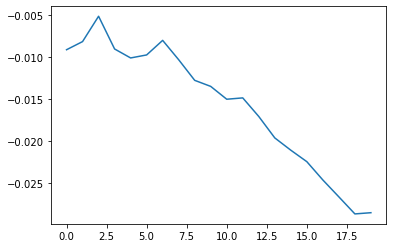

In [20]:
theta1, xi1, cov1 = TXPipe.get_theta_xi(XIP,'source_2', 'source_1', return_cov = True)
err1 = np.sqrt(np.diag(cov1))

theta2, xi2, cov2 = Firecrown.get_theta_xi(XIP,'source_2', 'source_1', return_cov = True)
err2 = np.sqrt(np.diag(cov2))

plt.plot((xi1-xi2)/err1)


In [6]:
Value1 = []
for i in range(len(TXPipe_theory.get_data_points())):
    Value1.append(TXPipe_theory.get_data_points()[i].value)
    
Value2 = []
for i in range(len(TXPipe_data.get_data_points())):
    Value2.append(TXPipe_data.get_data_points()[i].value)

Value3 = []
for i in range(len(Firecrown.get_data_points())):
    Value3.append(Firecrown.get_data_points()[i].value)

Value1 = np.array(Value1)
Value2 = np.array(Value2)
Value3 = np.array(Value3)

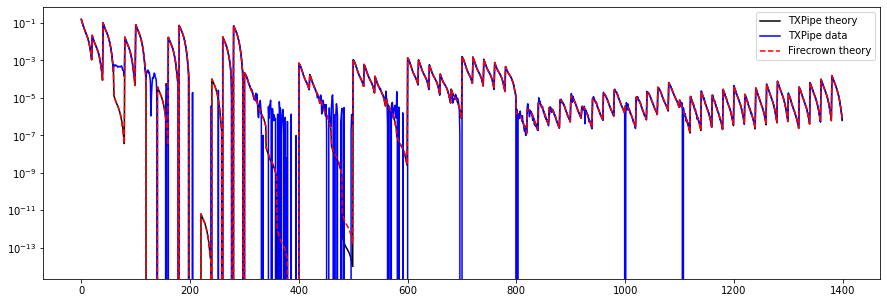

In [10]:
plt.figure(figsize=(15,5))
plt.plot(Value1, c='k', label='TXPipe theory')
plt.plot(Value2, c='b', label='TXPipe data')
plt.plot(Value3, c='r', label='Firecrown theory', ls='--')
plt.yscale('log')
plt.legend()

In [15]:
cov = TXPipe_theory.covariance.covmat

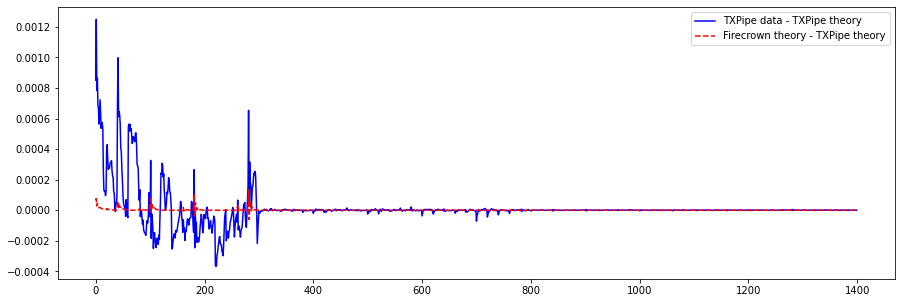

In [19]:
plt.figure(figsize=(15,5))
plt.plot(Value2-Value1, c='b', label='TXPipe data - TXPipe theory')
plt.plot(Value3-Value1, c='r', label='Firecrown theory - TXPipe theory', ls='--')
plt.legend()

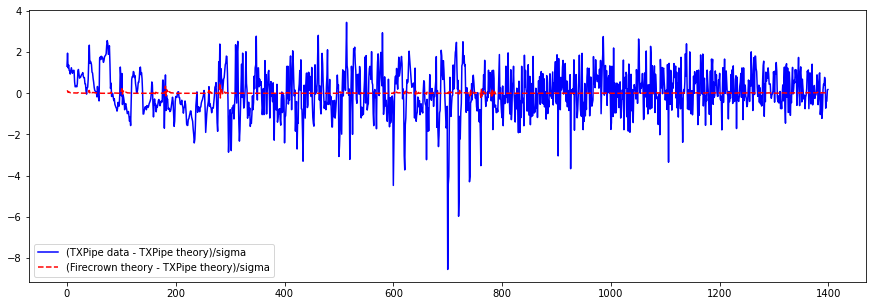

In [20]:
plt.figure(figsize=(15,5))
plt.plot((Value2-Value1)/np.diag(cov)**0.5, c='b', label='(TXPipe data - TXPipe theory)/sigma')
plt.plot((Value3-Value1)/np.diag(cov)**0.5, c='r', label='(Firecrown theory - TXPipe theory)/sigma', ls='--')
plt.legend()

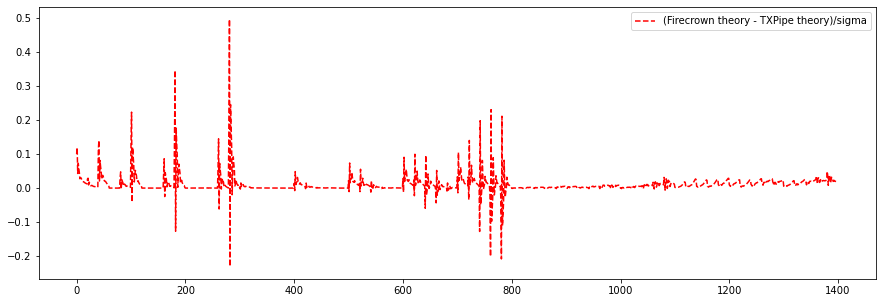

In [18]:
plt.figure(figsize=(15,5))
plt.plot((Value3-Value1)/np.diag(cov)**0.5, c='r', label='(Firecrown theory - TXPipe theory)/sigma', ls='--')
plt.legend()

/var/folders/mc/gj6kz6750g7dks2k81t8xyl80000gn/T/ipykernel_26679/4294697450.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot((Value1/Value3)[700:], c='r', label='TXPipe theory/Firecrown theory')


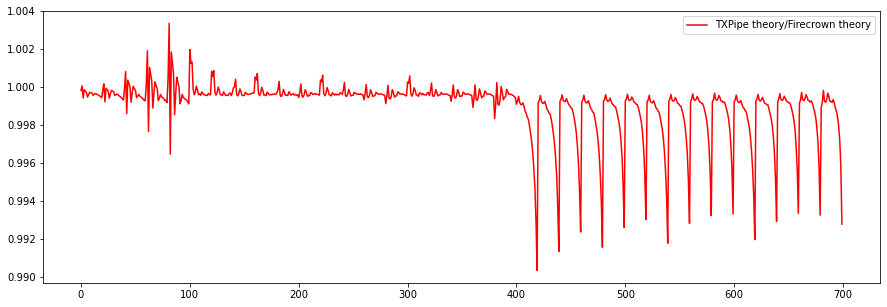

In [25]:
plt.figure(figsize=(15,5))
plt.plot((Value1/Value3)[700:], c='r', label='TXPipe theory/Firecrown theory')
plt.legend()

In [53]:
cov = TXPipe.covariance.covmat

In [51]:
# TXPipe.get_data_points()

## Now look at Firecrown output instead of sacc files

Note that the ordering of the sacc file and the firecrown output is different!

800
60.05808899991185


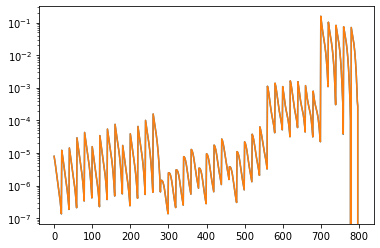

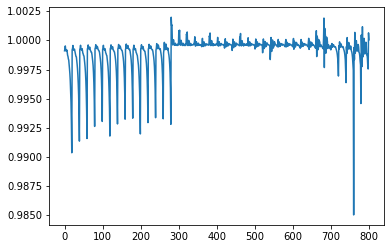

In [50]:
TXPipe_theory_dir = 'datablock_txpipe_theory/data_vector/'

data = np.loadtxt(TXPipe_theory_dir+'firecrown_data.txt')
theory = np.loadtxt(TXPipe_theory_dir+'firecrown_theory.txt')
invcov = np.loadtxt(TXPipe_theory_dir+'firecrown_inverse_covariance.txt')
plt.figure()
plt.plot(data)
plt.plot(theory)
plt.yscale('log')
plt.figure()
plt.plot(data/theory)
print (len(data))

print(np.dot(np.dot(data-theory, invcov), data-theory))

1710.9711712553622

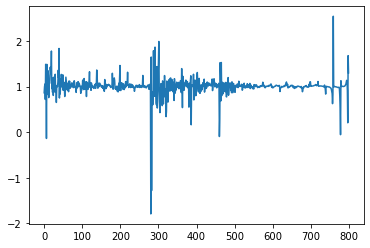

In [47]:
TXPipe_data_dir = 'datablock_txpipe_data/data_vector/'

data = np.loadtxt(TXPipe_data_dir+'firecrown_data.txt')
theory = np.loadtxt(TXPipe_data_dir+'firecrown_theory.txt')
invcov = np.loadtxt(TXPipe_data_dir+'firecrown_inverse_covariance.txt')
plt.plot(data/theory)

np.dot(np.dot(data-theory, invcov), data-theory)

5.931023691316353e-12

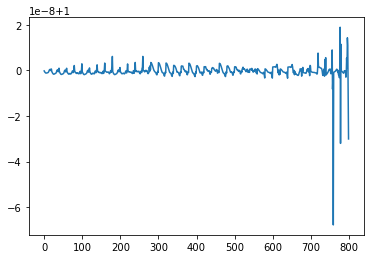

In [46]:
Firecrown_theory_dir = 'datablock_firecrown_theory/data_vector/'

data = np.loadtxt(Firecrown_theory_dir+'firecrown_data.txt')
theory = np.loadtxt(Firecrown_theory_dir+'firecrown_theory.txt')
invcov = np.loadtxt(Firecrown_theory_dir+'firecrown_inverse_covariance.txt')
plt.plot(data/theory)

np.dot(np.dot(data-theory, invcov), data-theory)